In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Predict new price for used cars

In [29]:
df = pd.read_csv("cars24.csv")
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [30]:
# Univariate Analysis - numeric 
df.shape

(6019, 14)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [32]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [ ]:
# list - year, km_driven, seats, mileage, engine, power, new_price

In [46]:
df.drop(columns = ["Unnamed: 0","New_Price"], inplace=True)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [9]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [11]:
df["Kilometers_Driven"].describe()

count    6.019000e+03
mean     5.873838e+04
std      9.126884e+04
min      1.710000e+02
25%      3.400000e+04
50%      5.300000e+04
75%      7.300000e+04
max      6.500000e+06
Name: Kilometers_Driven, dtype: float64

In [34]:
df["Mileage"] = df["Mileage"].str.split(expand=True)[0].astype("float")
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,NaN,17.74


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 564.4+ KB


In [36]:
df["Engine"] = df["Engine"].str.split(expand=True)[0].astype("float")
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,NaN,17.74


In [37]:
df.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [40]:
df["Power"].unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

In [41]:
df[df["Power"] == 'null bhp']

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
76,76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,null bhp,5.0,NaN,2.00
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.0,null bhp,5.0,NaN,1.30
89,89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,null bhp,5.0,NaN,2.10
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,null bhp,5.0,NaN,0.85
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,null bhp,5.0,NaN,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.00,1086.0,null bhp,5.0,NaN,1.20
5893,5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.50,1061.0,null bhp,NaN,NaN,1.75
5925,5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.50,1798.0,null bhp,5.0,NaN,2.85
5943,5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.00,2112.0,null bhp,6.0,NaN,1.70


In [43]:
df["Power"].replace(to_replace='null bhp',value = np.nan, inplace=True)

In [44]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [45]:
df["Power"] = df["Power"].str.split(expand=True)[0].astype("float")
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [47]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [49]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6017.000000,5983.000000,5876.000000,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134961,1621.276450,113.253050,5.278735,9.479468
std,3.269742,9.126884e+04,4.582289,601.355233,53.874957,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [57]:
df[df["Mileage"] == 0]["Name"].unique()

array(['Land Rover Freelander 2 TD4 SE',
       'Mercedes-Benz C-Class Progressive C 220d',
       'Hyundai Santro Xing XL', 'Honda City 1.5 GXI', 'Ford Figo Diesel',
       'Volkswagen Jetta 2007-2011 1.9 L TDI',
       'Hyundai Santro GLS I - Euro I',
       'Mercedes-Benz New C-Class Progressive C 200',
       'Hyundai Santro LS zipPlus', 'Hyundai Santro Xing XP',
       'Mercedes-Benz M-Class ML 350 4Matic',
       'Land Rover Range Rover 3.0 D', 'Smart Fortwo CDI AT',
       'Hyundai Santro Xing GL', 'Land Rover Freelander 2 TD4 S',
       'Hyundai Santro GLS I - Euro II', 'Maruti Baleno Vxi',
       'Land Rover Range Rover Sport 2005 2012 Sport',
       'Hyundai Santro DX', 'Mahindra Jeep MM 550 PE',
       'Hyundai Santro LP zipPlus', 'Toyota Qualis RS E2',
       'Hyundai Santro AT', 'Hyundai Santro GLS II - Euro II',
       'Skoda Superb 3.6 V6 FSI', 'Hyundai Santro GS',
       'Audi A7 2011-2015 Sportback',
       'Hyundai Santro GS zipDrive - Euro II', 'Fiat Siena 1.2 ELX',


In [55]:
# how to fix this values with mileage 0
df[df["Name"] == "Honda City 1.5 GXI"]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,2.95
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,1.50
3305,Honda City 1.5 GXI,Jaipur,2007,75055,Petrol,Manual,First,12.8,1493.0,100.0,5.0,2.30
4767,Honda City 1.5 GXI,Mumbai,2005,81000,Petrol,Manual,Second,12.8,1493.0,100.0,5.0,1.10
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,1.85


In [65]:
car_with_nom = df[df["Mileage"] == 0]["Name"].unique().tolist()

for car in car_with_nom:
    print(car,df[df["Name"] == car]["Mileage"].max())
    print("-"*60)

Land Rover Freelander 2 TD4 SE 0.0
------------------------------------------------------------
Mercedes-Benz C-Class Progressive C 220d 0.0
------------------------------------------------------------
Hyundai Santro Xing XL 0.0
------------------------------------------------------------
Honda City 1.5 GXI 12.8
------------------------------------------------------------
Ford Figo Diesel 0.0
------------------------------------------------------------
Volkswagen Jetta 2007-2011 1.9 L TDI 0.0
------------------------------------------------------------
Hyundai Santro GLS I - Euro I 0.0
------------------------------------------------------------
Mercedes-Benz New C-Class Progressive C 200 0.0
------------------------------------------------------------
Hyundai Santro LS zipPlus 0.0
------------------------------------------------------------
Hyundai Santro Xing XP 0.0
------------------------------------------------------------
Mercedes-Benz M-Class ML 350 4Matic 0.0
------------------

In [66]:
car_with_nom = df[df["Seats"] == 0]["Name"].unique().tolist()

for car in car_with_nom:
    print(car,df[df["Name"] == car]["Seats"].max())
    print("-"*60)

Audi A4 3.2 FSI Tiptronic Quattro 0.0
------------------------------------------------------------


In [67]:
df[df["Seats"] == 0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,NaN,0.0,18.0


In [68]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [69]:
df.describe(include="object")

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,6019,6019,6019,6019,6019
unique,1876,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,49,790,3205,4299,4929


<Figure size 720x3600 with 0 Axes>

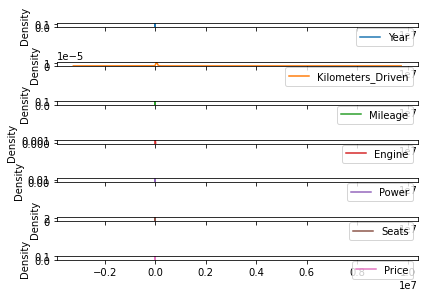

In [79]:
plt.figure(figsize=(10,50))
df.select_dtypes("number").plot(kind="kde",subplots=True)
plt.tight_layout()

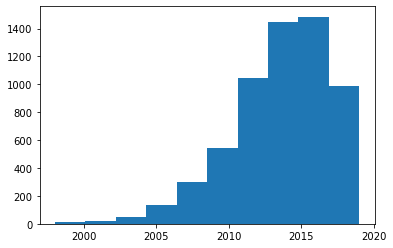

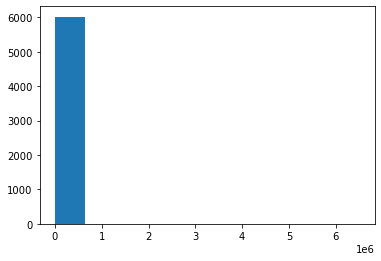

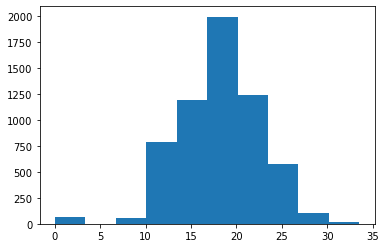

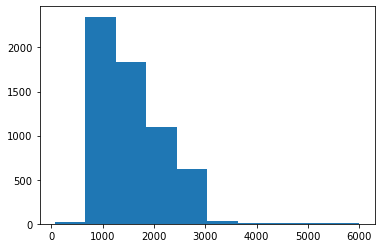

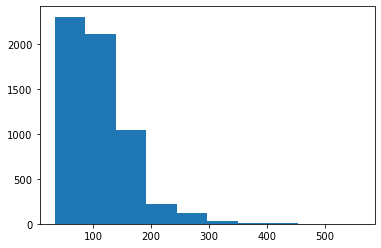

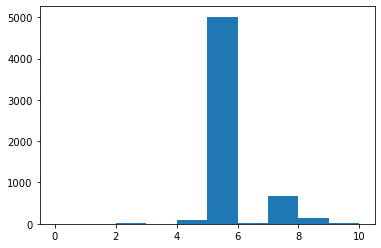

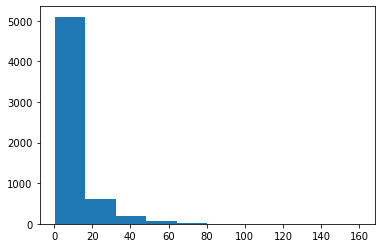

In [83]:
num_data = df.select_dtypes("number")

for col in num_data:
    plt.hist(df[col])
    plt.show()

In [84]:
df.select_dtypes(include="object")

,Name,Location,Fuel_Type,Transmission,Owner_Type
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First
2,Honda Jazz V,Chennai,Petrol,Manual,First
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second
...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,Diesel,Manual,First
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,Diesel,Manual,First
6016,Mahindra Xylo D4 BSIV,Jaipur,Diesel,Manual,Second
6017,Maruti Wagon R VXI,Kolkata,Petrol,Manual,First


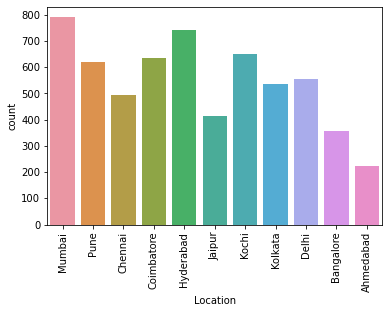

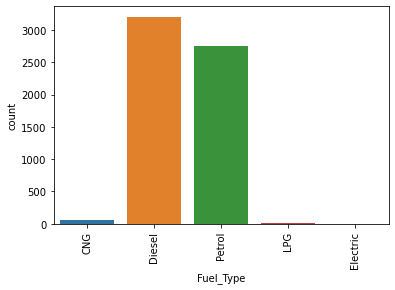

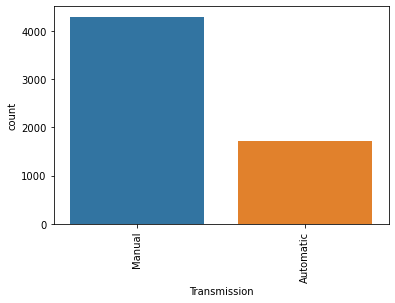

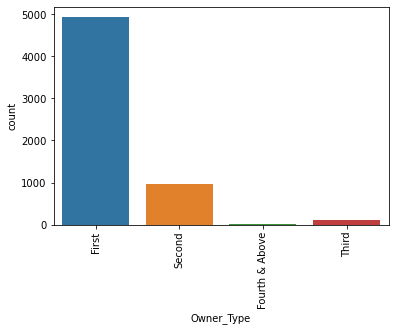

In [93]:
 for col in  df.describe(include="object").iloc[ : , 1 :  ]:
        sns.countplot(x = df[col])
        plt.xticks(rotation=90)
        plt.show()

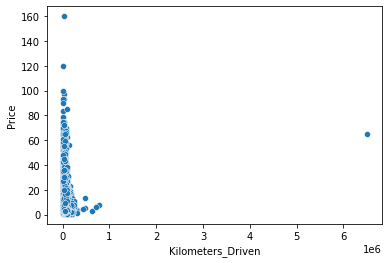

In [94]:
# # relation b/w km driven and price
sns.scatterplot(data=df , x = "Kilometers_Driven", y="Price")
plt.show()

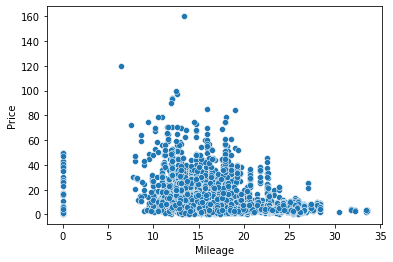

In [95]:
# # relation b/w km driven and price
sns.scatterplot(data=df , x = "Mileage", y="Price")
plt.show()

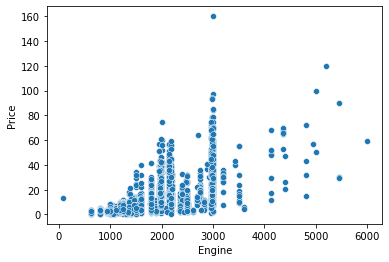

In [96]:
sns.scatterplot(data=df , x = "Engine", y="Price")
plt.show()

<AxesSubplot:>

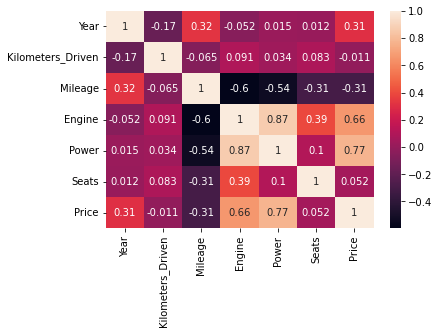

In [99]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
# price - num
# cat - location, transmission, fuel type, seats

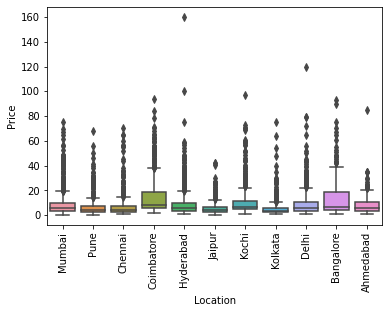

In [101]:
sns.boxplot(data=df, x = "Location", y = "Price")
plt.xticks(rotation = 90)
plt.show()

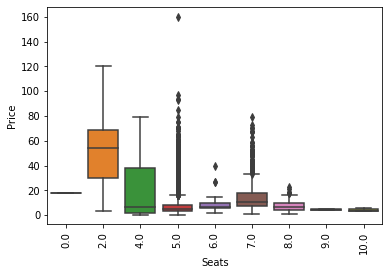

In [102]:
sns.boxplot(data=df, x = "Seats", y = "Price")
plt.xticks(rotation = 90)
plt.show()

In [103]:
def SeatsCat(x):
    if x <= 2:
        return "2_seater"
    elif x > 2 and x <=5:
        return "4_5_seater"
    else:
        return ">5"


In [105]:
df["Seats_cat"] = df["Seats"].apply(SeatsCat)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Seats_cat
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,4_5_seater
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,4_5_seater
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,4_5_seater
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,>5
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,4_5_seater


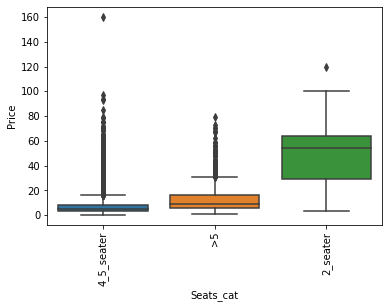

In [106]:
sns.boxplot(data=df, x = "Seats_cat", y = "Price")
plt.xticks(rotation = 90)
plt.show()

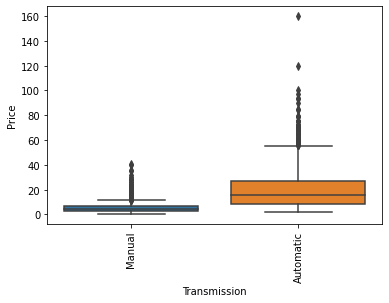

In [107]:
sns.boxplot(data=df, x = "Transmission", y = "Price")
plt.xticks(rotation = 90)
plt.show()

In [108]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Seats_cat
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,4_5_seater
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,4_5_seater
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,4_5_seater
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,>5
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,4_5_seater


In [112]:
df["Engine"].quantile(.02)

796.0

In [116]:
df[df["Seats"].isnull()].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Seats_cat
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,2.95,>5
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,NaN,NaN,NaN,2.11,>5
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498.0,99.0,NaN,3.60,>5
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,NaN,NaN,NaN,1.75,>5
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0,NaN,NaN,NaN,26.50,>5


In [118]:
df[df["Name"] == "Honda City 1.5 GXI"]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Seats_cat
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,2.95,>5
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,1.50,>5
3305,Honda City 1.5 GXI,Jaipur,2007,75055,Petrol,Manual,First,12.8,1493.0,100.0,5.0,2.30,4_5_seater
4767,Honda City 1.5 GXI,Mumbai,2005,81000,Petrol,Manual,Second,12.8,1493.0,100.0,5.0,1.10,4_5_seater
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,1.85,>5


In [119]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Seats_cat
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,4_5_seater
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,4_5_seater
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,4_5_seater
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,>5
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,4_5_seater


In [124]:
df[["Brand","Model"]]  =df["Name"].str.split(expand=True)[[0,1]]
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Seats_cat,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,4_5_seater,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,4_5_seater,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,4_5_seater,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,>5,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,4_5_seater,Audi,A4


In [127]:
b = df["Name"].str.split(expand=True)[0]

In [135]:
df.drop("Model",axis=1, inplace=True)

In [130]:
df.insert(0,"Brand",b)

In [136]:
c = df["Name"].str.split(expand=True)[1]
df.insert(1,"Model",c)

In [137]:
df.head(2)

,Brand,Model,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Seats_cat
0,Maruti,Wagon,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,4_5_seater
1,Hyundai,Creta,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,4_5_seater


In [138]:
df["Brand"].nunique()

31

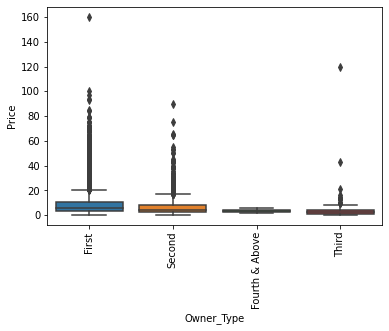

In [139]:
sns.boxplot(data=df, x = "Owner_Type", y = "Price")
plt.xticks(rotation = 90)
plt.show()

In [140]:
df["Year"]

0       2010
1       2015
2       2011
3       2012
4       2013
        ... 
6014    2014
6015    2015
6016    2012
6017    2013
6018    2011
Name: Year, Length: 6019, dtype: int64

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

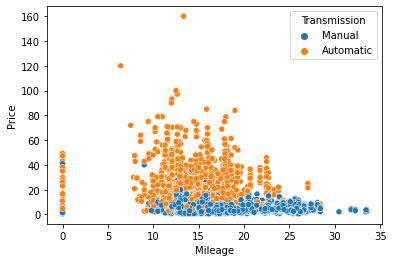

In [141]:
# Multivariate
sns.scatterplot(data=df, x = "Mileage", y = "Price", hue="Transmission")

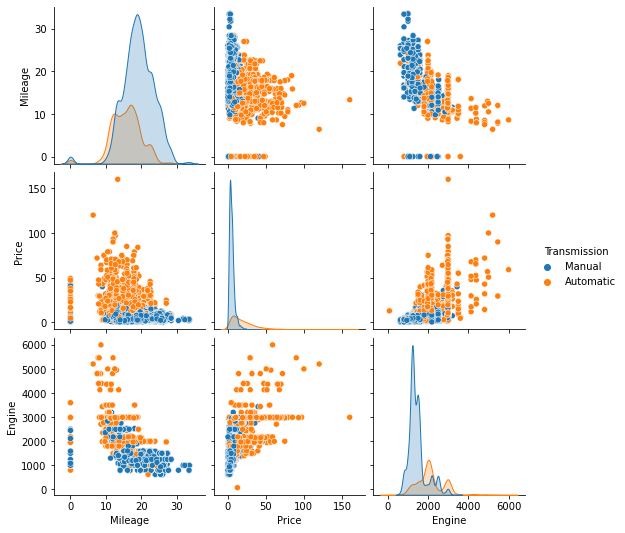

In [147]:
sns.pairplot(data = df,
             x_vars = ["Mileage","Price","Engine"],
             y_vars = ["Mileage","Price","Engine"],
             hue="Transmission")  # don't use when datapoints are more than 2000

<AxesSubplot:xlabel='Engine', ylabel='Price'>

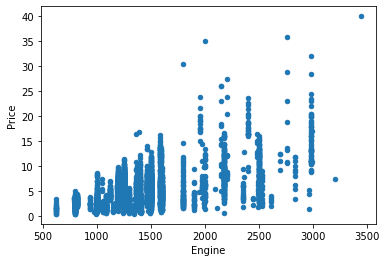

In [152]:
df[df["Transmission"] == "Manual"].plot(kind="scatter", x="Engine",y="Price")

In [153]:
df.head()

,Brand,Model,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Seats_cat
0,Maruti,Wagon,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,4_5_seater
1,Hyundai,Creta,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,4_5_seater
2,Honda,Jazz,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,4_5_seater
3,Maruti,Ertiga,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,>5
4,Audi,A4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,4_5_seater


In [154]:
df.dropna(inplace=True)
df.isnull().sum()

Brand                0
Model                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Seats_cat            0
dtype: int64

In [155]:
df.drop("Name", axis=1, inplace=True)
df.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Seats_cat
0,Maruti,Wagon,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,4_5_seater
1,Hyundai,Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,4_5_seater
2,Honda,Jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,4_5_seater
3,Maruti,Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,>5
4,Audi,A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,4_5_seater


In [156]:
df.drop("Seats", axis=1, inplace=True)
df.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,Seats_cat
0,Maruti,Wagon,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,1.75,4_5_seater
1,Hyundai,Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,12.50,4_5_seater
2,Honda,Jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,4.50,4_5_seater
3,Maruti,Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,6.00,>5
4,Audi,A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,17.74,4_5_seater


In [ ]:
# preprocessing - Cat - Encoding
# Num - scaling

In [158]:
df["Brand"].nunique()

30

In [161]:
new_df = pd.get_dummies(df.iloc[ : , 2 : ], drop_first=True)
new_df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_cat_4_5_seater,Seats_cat_>5
0,2010,72000,26.60,998.0,58.16,1.75,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,2015,41000,19.67,1582.0,126.20,12.50,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0
2,2011,46000,18.20,1199.0,88.70,4.50,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
3,2012,87000,20.77,1248.0,88.76,6.00,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
4,2013,40670,15.20,1968.0,140.80,17.74,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0


In [162]:
num_cols = ["Year","Kilometers_Driven","Mileage","Engine","Power"]
new_df[num_cols]

,Year,Kilometers_Driven,Mileage,Engine,Power
0,2010,72000,26.60,998.0,58.16
1,2015,41000,19.67,1582.0,126.20
2,2011,46000,18.20,1199.0,88.70
3,2012,87000,20.77,1248.0,88.76
4,2013,40670,15.20,1968.0,140.80
...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00
6015,2015,100000,24.40,1120.0,71.00
6016,2012,55000,14.00,2498.0,112.00
6017,2013,46000,18.90,998.0,67.10


In [163]:
from sklearn.preprocessing import StandardScaler

In [167]:
sc = StandardScaler()
sc.fit(new_df[num_cols])  # learn mu and sigma

StandardScaler()

In [168]:
sc.transform(new_df[num_cols])

array([[-1.09904   ,  0.14846755,  1.90644171, -1.04347645, -1.02300765],
       [ 0.481089  , -0.18789828,  0.31891644, -0.07271652,  0.23986179],
       [-0.7830142 , -0.13364573, -0.01783134, -0.70936216, -0.45616414],
       ...,
       [-0.4669884 , -0.03599113, -0.97996787,  1.44991378, -0.02370003],
       [-0.1509626 , -0.13364573,  0.14252474, -1.04347645, -0.85707507],
       [-0.7830142 , -0.12279522,  1.64070876, -1.14653658, -1.03340163]])

In [169]:
scaled_df = pd.DataFrame(sc.transform(new_df[num_cols]), columns = num_cols)
scaled_df.head(2)

,Year,Kilometers_Driven,Mileage,Engine,Power
0,-1.099040,0.148468,1.906442,-1.043476,-1.023008
1,0.481089,-0.187898,0.318916,-0.072717,0.239862


In [171]:
new_df.drop(columns = num_cols, inplace=True)

In [172]:
new_df

,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_cat_4_5_seater,Seats_cat_>5
0,1.75,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,12.50,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0
2,4.50,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
3,6.00,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
4,17.74,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,4.75,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
6015,4.00,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
6016,2.90,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1
6017,2.65,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0


In [ ]:
dropped rows with missing value

In [173]:
d = pd.DataFrame({"Name" : ["A","B",np.nan,"D"]})
d

,Name
0,A
1,B
2,NaN
3,D


In [174]:
d.dropna(inplace=True)

In [175]:
d

,Name
0,A
1,B
3,D


In [176]:
pd.concat([new_df, scaled_df])

,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,...,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_cat_4_5_seater,Seats_cat_>5,Year,Kilometers_Driven,Mileage,Engine,Power
0,1.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
1,12.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
2,4.50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
3,6.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
4,17.74,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.165063,-0.335845,2.318786,-0.627911,-0.729006
5868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.481089,0.452282,1.402465,-0.840681,-0.784688
5869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.466988,-0.035991,-0.979968,1.449914,-0.023700
5870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.150963,-0.133646,0.142525,-1.043476,-0.857075


In [179]:
new_df.reset_index(drop=True,inplace=True)

In [191]:
df1 = pd.concat([new_df, scaled_df],axis=1)
df1.head(2)

,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,...,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_cat_4_5_seater,Seats_cat_>5,Year,Kilometers_Driven,Mileage,Engine,Power
0,1.75,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,-1.099040,0.148468,1.906442,-1.043476,-1.023008
1,12.50,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0.481089,-0.187898,0.318916,-0.072717,0.239862


In [182]:
scaled_df.shape

(5872, 5)

In [188]:
m = df["Brand"].value_counts(normalize=True).round(2).to_dict()
df["Brand"].map(m)

0       0.20
1       0.18
2       0.10
3       0.20
4       0.04
        ... 
6014    0.20
6015    0.18
6016    0.05
6017    0.20
6018    0.02
Name: Brand, Length: 5872, dtype: float64

In [192]:
# df["Brand"]  - high valued, mid valued, low valued
x = df1.drop("Price",axis=1)
y = df1["Price"]

In [193]:
x.head(1)

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_cat_4_5_seater,Seats_cat_>5,Year,Kilometers_Driven,Mileage,Engine,Power
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,-1.09904,0.148468,1.906442,-1.043476,-1.023008


In [194]:
y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
5867     4.75
5868     4.00
5869     2.90
5870     2.65
5871     2.50
Name: Price, Length: 5872, dtype: float64

In [209]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,
                                                    test_size = .25, 
                                                    random_state = 40
                                                )

In [210]:
X_train.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_cat_4_5_seater,Seats_cat_>5,Year,Kilometers_Driven,Mileage,Engine,Power
3052,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,-0.150963,-0.257125,-0.290437,-0.057756,0.148914
5052,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0.165063,-0.187898,-0.292727,0.869785,0.478738
456,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0.165063,-0.144496,-0.567624,0.868123,1.052820
1854,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0.165063,0.039962,-1.625974,1.779041,1.312670
4114,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0.165063,-0.202807,-1.621392,2.272733,2.370629


In [208]:
y_train.head()

3052     5.35
5052     8.00
456     23.00
1854    10.55
4114    40.66
Name: Price, dtype: float64